# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('data_clean.pkl')
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2404\2012403129.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,transcript
ali,ali wong baby cobra transcript scraps from...
anthony,anthony jeselnik thoughts and prayers full ...
bill,bill burr im sorry you feel that way full t...
bo,page not found scraps from the loft \r\t\t...
carlin,george carlin its bad for ya full transcript...
dave,dave chappelle the age of spin transcript ...
gillis,shane gillis live in austin transcript scra...
hasan,page not found scraps from the loft \r\t\t...
jim,jim jefferies bare full transcript scraps ...
joe,joe rogan triggered transcript scraps from...


In [3]:
pip install textblob

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/626.3 kB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 174.1/626.3 kB 2.1 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/626.3 kB 2.2 MB/s eta 0:00:01
   ------------------------------ --------- 481.3/626.3 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 6.3 MB/s eta 0:00:01
 

In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
ali,ali wong baby cobra transcript scraps from...,0.069081,0.481761
anthony,anthony jeselnik thoughts and prayers full ...,0.055161,0.558863
bill,bill burr im sorry you feel that way full t...,0.010538,0.544590
bo,page not found scraps from the loft \r\t\t...,0.550000,0.350000
carlin,george carlin its bad for ya full transcript...,0.040305,0.504607
dave,dave chappelle the age of spin transcript ...,0.001691,0.513507
gillis,shane gillis live in austin transcript scra...,0.107117,0.506937
hasan,page not found scraps from the loft \r\t\t...,0.550000,0.350000
jim,jim jefferies bare full transcript scraps ...,0.041577,0.535498
joe,joe rogan triggered transcript scraps from...,0.080211,0.535336


In [6]:
full_name=['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais',
              'Shane Gillis', 'Lewis Black', 'Sammy Obeid', 'Tom Segura', 'Robin Williams', 'George Carlin']
full_name.sort()
data['full_name']=full_name

In [7]:
data

,transcript,polarity,subjectivity,full_name
ali,ali wong baby cobra transcript scraps from...,0.069081,0.481761,Ali Wong
anthony,anthony jeselnik thoughts and prayers full ...,0.055161,0.558863,Anthony Jeselnik
bill,bill burr im sorry you feel that way full t...,0.010538,0.544590,Bill Burr
bo,page not found scraps from the loft \r\t\t...,0.550000,0.350000,Bo Burnham
carlin,george carlin its bad for ya full transcript...,0.040305,0.504607,Dave Chappelle
dave,dave chappelle the age of spin transcript ...,0.001691,0.513507,George Carlin
gillis,shane gillis live in austin transcript scra...,0.107117,0.506937,Hasan Minhaj
hasan,page not found scraps from the loft \r\t\t...,0.550000,0.350000,Jim Jefferies
jim,jim jefferies bare full transcript scraps ...,0.041577,0.535498,Joe Rogan
joe,joe rogan triggered transcript scraps from...,0.080211,0.535336,John Mulaney


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2404\1474309349.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


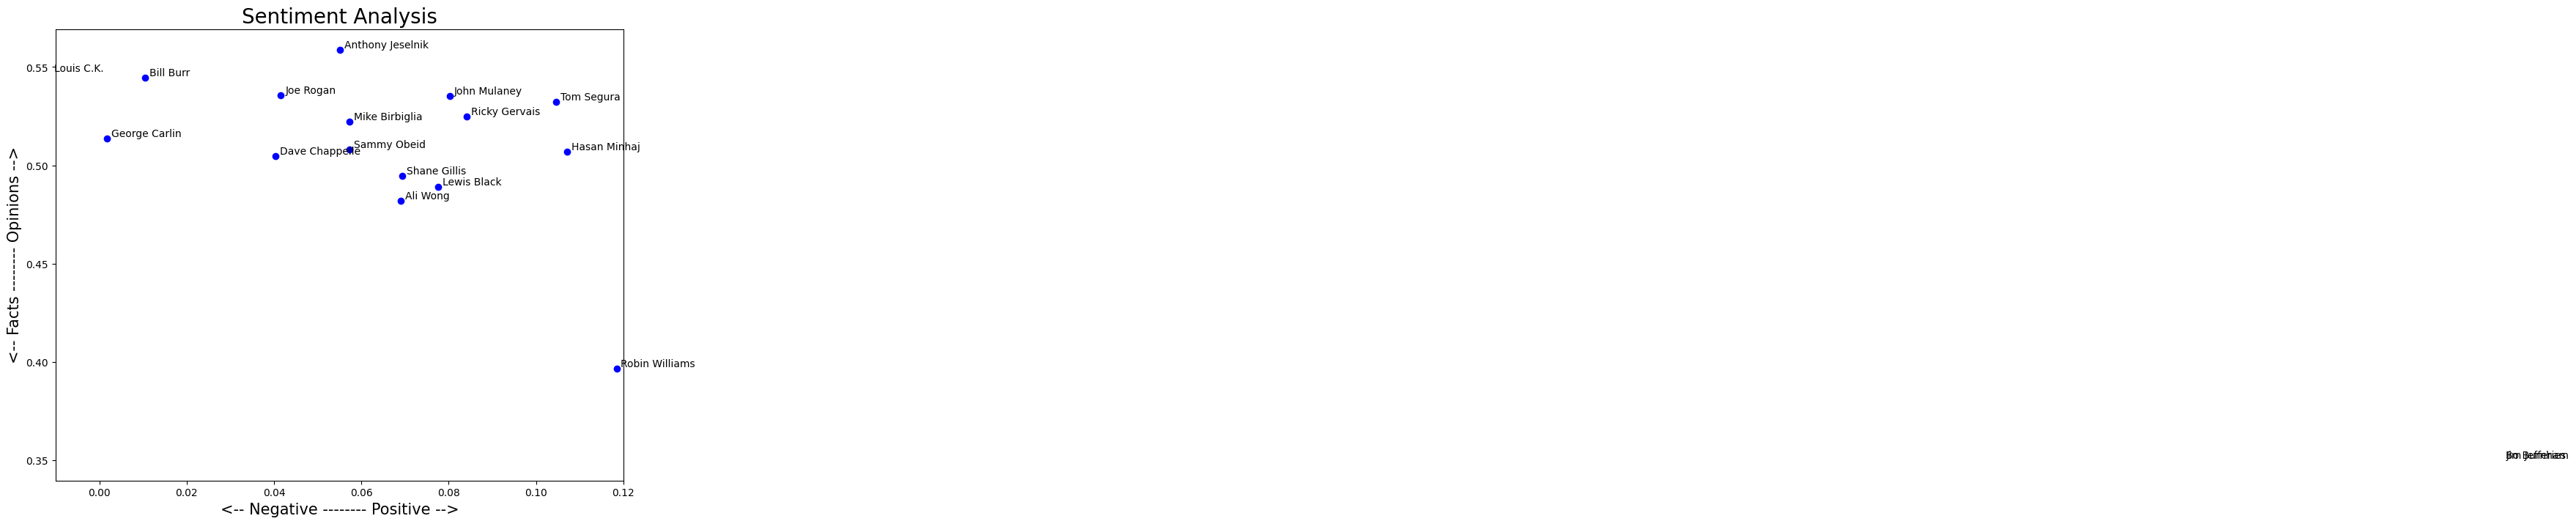

In [9]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [10]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [11]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity,full_name
ali,ali wong baby cobra transcript scraps from...,0.069081,0.481761,Ali Wong
anthony,anthony jeselnik thoughts and prayers full ...,0.055161,0.558863,Anthony Jeselnik
bill,bill burr im sorry you feel that way full t...,0.010538,0.544590,Bill Burr
bo,page not found scraps from the loft \r\t\t...,0.550000,0.350000,Bo Burnham
carlin,george carlin its bad for ya full transcript...,0.040305,0.504607,Dave Chappelle
dave,dave chappelle the age of spin transcript ...,0.001691,0.513507,George Carlin
gillis,shane gillis live in austin transcript scra...,0.107117,0.506937,Hasan Minhaj
hasan,page not found scraps from the loft \r\t\t...,0.550000,0.350000,Jim Jefferies
jim,jim jefferies bare full transcript scraps ...,0.041577,0.535498,Joe Rogan
joe,joe rogan triggered transcript scraps from...,0.080211,0.535336,John Mulaney


In [12]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' ali wong baby cobra   transcript  scraps from the loft   \r\t\tskip to content moviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks search search moviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks search searchcomedy ali wong baby cobra   transcript \t\t\t\t\t\t\t\t\t\tseptember  \t\t\t\t\t\t\t\tali wongs stand up special delves into her sexual adventu

In [13]:
# The list has 10 elements, one for each transcript
len(list_pieces)

18

In [14]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [15]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.13123299319727894,
  0.019225327812284334,
  0.1028939909297052,
  0.0813985661604709,
  -0.029660421545667448,
  0.11699678187773427,
  0.04185551948051948,
  0.10265717398070336,
  0.03434946656258132,
  0.10158730158730153],
 [0.20932049287518031,
  -0.04544205794205794,
  -0.06796737213403882,
  0.013250561167227852,
  0.13769785769785772,
  0.09077906162464984,
  0.08467032967032967,
  -0.07509479717813053,
  0.0497701671088768,
  0.20120483258238359],
 [-0.003271628242558479,
  -0.01732648551844982,
  -0.007286290098790106,
  0.01145983645983645,
  -0.05371572871572872,
  0.09005657708628005,
  0.010839546256212916,
  -0.026292183540082708,
  0.057880874572051044,
  0.05391130217519107],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5333333333333333],
 [-0.006241306507699954,
  0.06350940725940722,
  0.10389535233285226,
  -0.0008423005565862533,
  -0.041360229276895914,
  0.01286138260365064,
  0.12443669038496626,
  0.1112911025145067,
  -0.0030602030602030574,
  0.06542

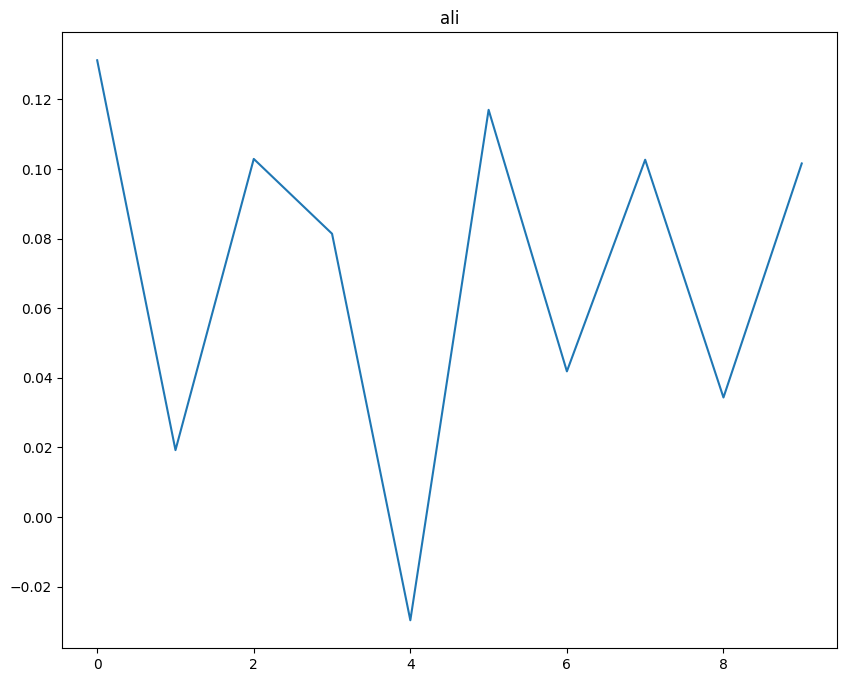

In [16]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2404\2116430422.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


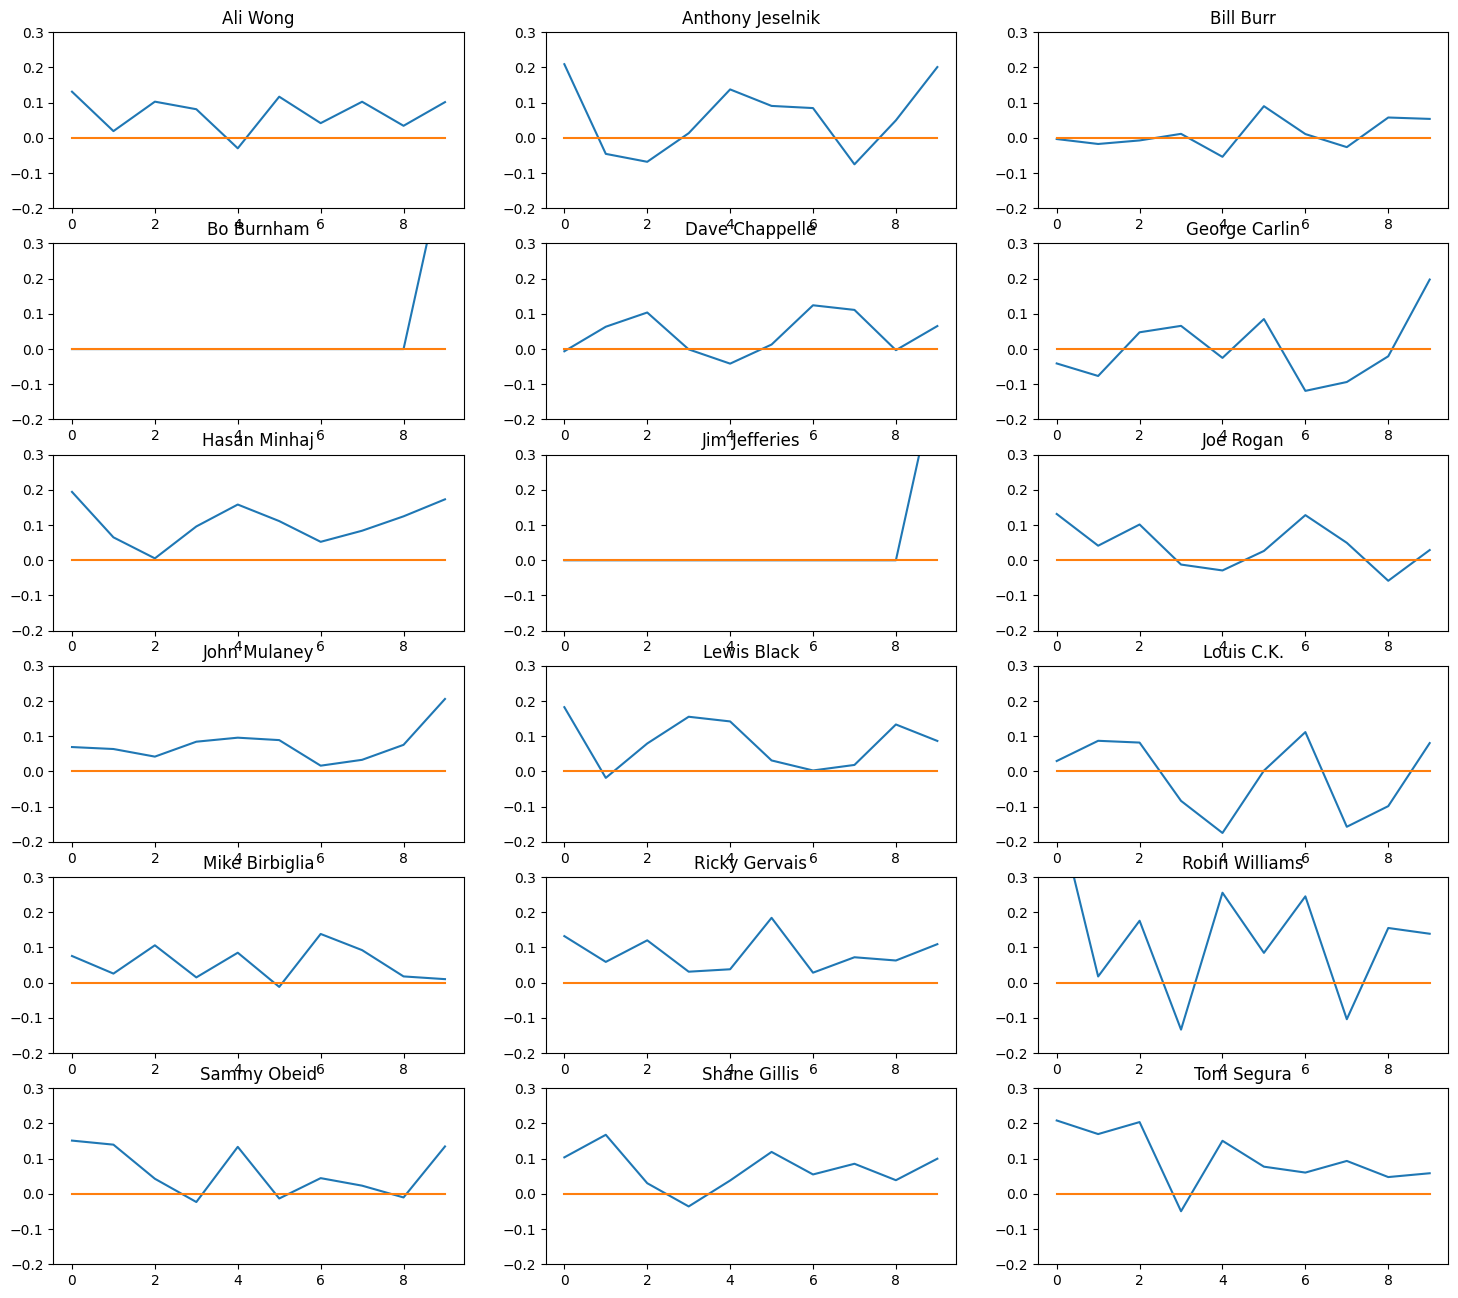

In [19]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [18, 16]

for index, comedian in enumerate(data.index):    
    plt.subplot(6, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


<BarContainer object of 18 artists>

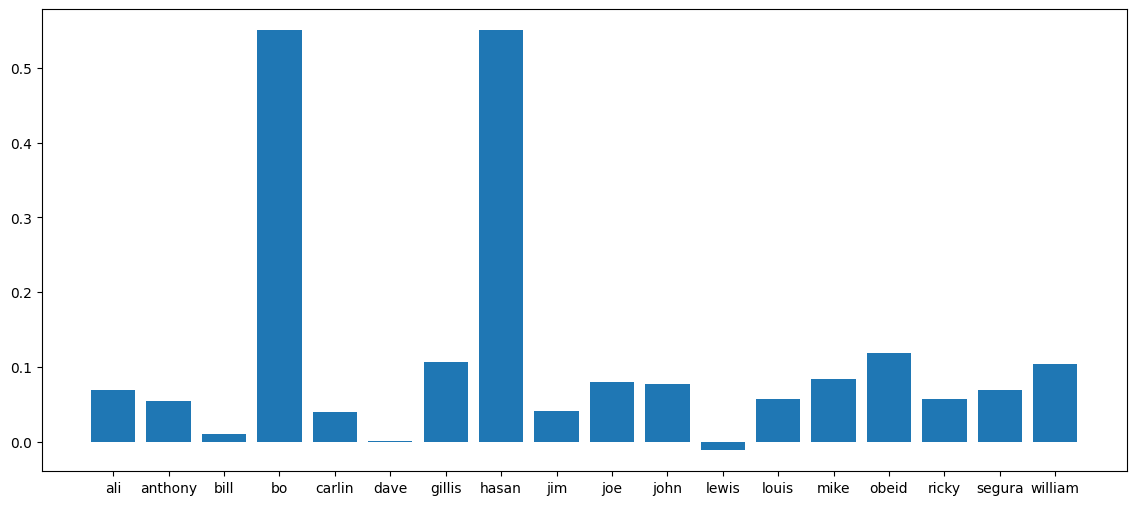

In [35]:
plt.figure(figsize=(14,6))
plt.bar(data.index,data["polarity"])

In [37]:
data["subjectivity"]>0.5

ali        False
anthony     True
bill        True
bo         False
carlin      True
dave        True
gillis      True
hasan      False
jim         True
joe         True
john       False
lewis       True
louis       True
mike        True
obeid      False
ricky       True
segura     False
william     True
Name: subjectivity, dtype: bool

(0.0, 1.0)

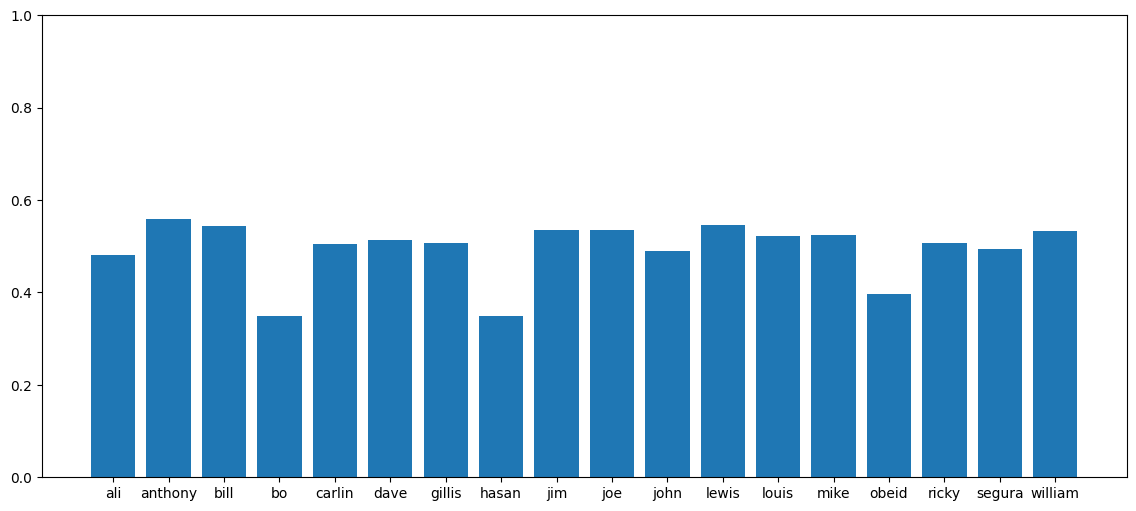

In [39]:
plt.figure(figsize=(14,6))
plt.bar(data.index,data["subjectivity"])
plt.ylim(0,1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2404\2685239568.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


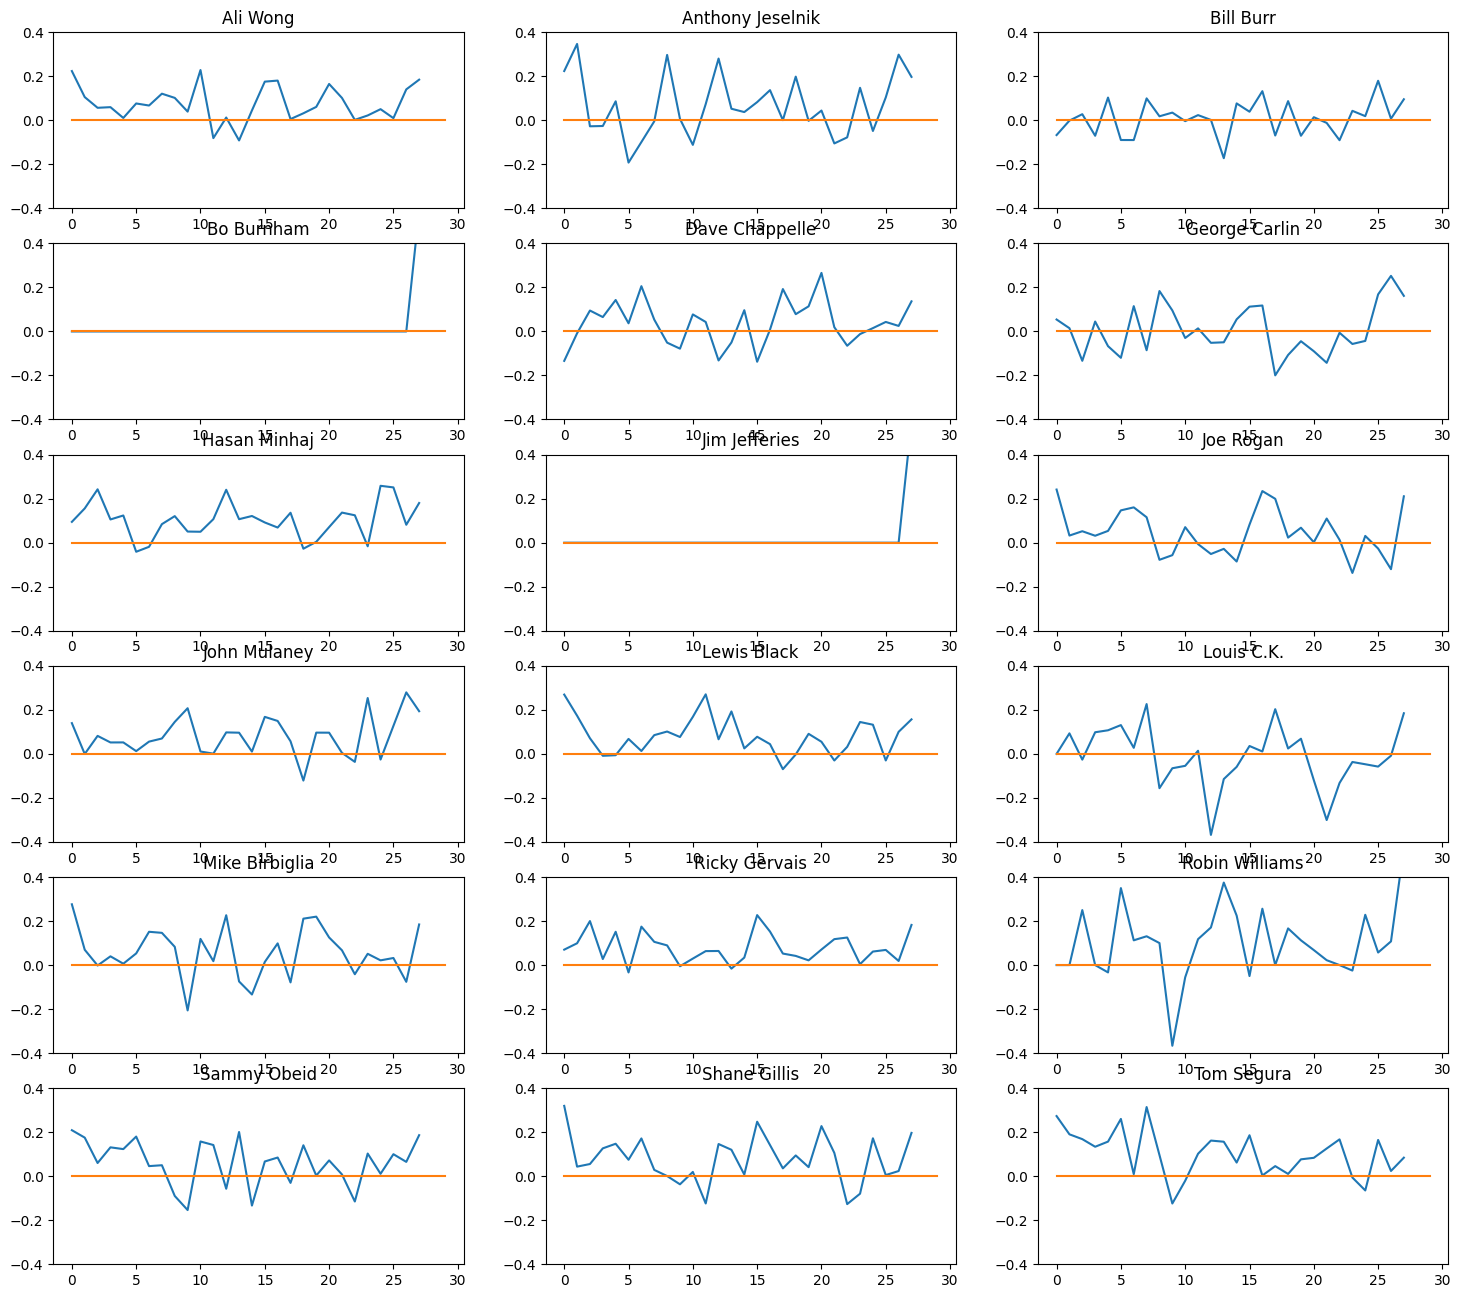

In [41]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,n=28)
    list_pieces.append(split)
    
list_pieces
len(list_pieces)
len(list_pieces[0])
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

plt.rcParams['figure.figsize'] = [18, 16]

for index, comedian in enumerate(data.index):    
    plt.subplot(6, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,30), np.zeros(30))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.4, ymax=.4)
    
plt.show()